<img src="https://github.com/ladata-ufs/IX-SEMAC/blob/main/id%20visual/logotipo-extenso-fundo-cinza.png?raw=true" alt="ladata" width="400" align="center"/>

# **Análise de Dados: Conceitos, Técnicas e Aplicações**

> Notebook desenvolvido para a Oficina "Análise de Dados: Conceitos, Técnicas e Aplicações", ministrada na X SEMAC da UFS.


#### **Objetivo**: Oferecer um notebook que servirá como material para os participantes da oficina interagirem e entenderem os principais conceitos da análise de dados utilizando Python.


## 🔽 **Bibliotecas**

Para esse projeto, as principais bibliotecas necessárias foram: [Pandas](https://pandas.pydata.org), [NumPy](https://numpy.org), [MatplotLib](https://matplotlib.org), [Seaborn](https://seaborn.pydata.org/) e [Scipy](https://docs.scipy.org/doc/scipy/)

- **NumPy**: Biblioteca fundamental para cálculos numéricos, oferecendo suporte a arrays multidimensionais e operações matemáticas otimizadas para manipulação de grandes volumes de dados.

- **Pandas**: Utilizada para análise e manipulação de dados, fornece estruturas como DataFrames e Series, facilitando o trabalho com dados tabulares e séries temporais.

- **Matplotlib**: Biblioteca de visualização de dados que cria gráficos estáticos, interativos ou animados em Python, oferecendo controle detalhado sobre estilos e layouts.

- **Seaborn**: Baseada no Matplotlib, simplifica a criação de gráficos estatísticos elegantes, com foco em análise exploratória e suporte a dados organizados em DataFrames.

- **Scipy**: Biblioteca voltada para computação científica, oferece funções otimizadas para álgebra linear, integração, otimização, estatística e resolução de problemas matemáticos complexos, ampliando as capacidades do NumPy para análises avançadas.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 🐟 **Conceitos**

#### **Series**

Uma **Series** é uma estrutura de dados unidimensional da biblioteca `pandas`. Ela é essencialmente uma coluna de dados em um DataFrame ou uma lista indexada de valores. Cada valor em uma Series tem um índice associado, permitindo acesso rápido aos dados.

Principais características:
- Similar a uma lista ou vetor em outras linguagens.
- Suporta diferentes tipos de dados.
- Indexação automática ou personalizada.

Abaixo está um exemplo de criação de uma Series.


In [2]:
# Criando uma Series a partir de uma lista
idades = pd.Series([25, 30, 35], name='Idade')
idades

0    25
1    30
2    35
Name: Idade, dtype: int64

In [3]:
# Criando uma Series a partir de um dicionário
dic_pop = {
    'São Paulo': 12.33,
    'Rio de Janeiro': 6.75,
    'Curitiba': 1.92
}
populacao = pd.Series(dic_pop, name='População (milhões)')
populacao

São Paulo         12.33
Rio de Janeiro     6.75
Curitiba           1.92
Name: População (milhões), dtype: float64

### **DataFrame**

Um **DataFrame** é uma estrutura de dados bidimensional em forma de tabela que faz parte da biblioteca `pandas`. Ele é composto por linhas e colunas, permitindo manipulação e análise de dados tabulares. Um DataFrame pode conter diferentes tipos de dados, como números, strings e valores booleanos.

Principais características:
- Estrutura semelhante a uma planilha de Excel ou tabela de banco de dados.
- Indexação por rótulos ou números.
- Colunas podem ter diferentes tipos de dados.

Abaixo está um exemplo de criação de um DataFrame.

In [4]:
# Criando um DataFrame a partir de um dicionário de listas
data = {
    'Nome': ['Ana', 'Bruno', 'Carla'],
    'Idade': [25, 30, 35],
    'Cidade': ['São Paulo', 'Rio de Janeiro', 'Curitiba']
}
df = pd.DataFrame(data)
df

,Nome,Idade,Cidade
0,Ana,25,São Paulo
1,Bruno,30,Rio de Janeiro
2,Carla,35,Curitiba


## **🛠 Tratamento**

Responsável pela parte da importação, limpeza e geração de objetos de análise.

In [11]:
# Importação e primeira olhadela nos dados
db = pd.read_csv("./dados/vgvendas.csv", decimal=".")
db.head(3)

FileNotFoundError: [Errno 2] No such file or directory: './dados/vgvendas.csv'

In [6]:
# Para ver informações mais gerais sobre os dados
# O info exibe todas as colunas, a contagem de valores não nulos e o tipo de dado
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16631 entries, 0 to 16630
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ranking                16631 non-null  int64  
 1   nome_jogo              16631 non-null  object 
 2   plataforma             16631 non-null  object 
 3   ano                    16359 non-null  float64
 4   genero                 16631 non-null  object 
 5   editora                16572 non-null  object 
 6   NA_vendas              16631 non-null  float64
 7   EU_vendas              16631 non-null  float64
 8   JP_vendas              16631 non-null  float64
 9   outras_vendas          16631 non-null  float64
 10  global_vendas          16631 non-null  float64
 11  preco                  16631 non-null  float64
 12  receita_NA             16631 non-null  float64
 13  receita_EU             16631 non-null  float64
 14  receita_JP             16631 non-null  float64
 15  re

#### Valores duplicados
Em um conjunto de dados, um valor duplicado ocorre quando uma ou mais linhas contêm exatamente os mesmos valores em todas ou em algumas colunas, dependendo do contexto. A presença de duplicatas pode distorcer análises, especialmente quando os dados representam eventos únicos ou somatórios.

Para identificar o número de linhas duplicadas, usamos:

In [7]:
# O duplicated() vai procurar linhas duplicadas e o sum() vai somar o número delas
db.duplicated().sum()

33

##### Opção 1: Marcar duplicadas para análise posterior

In [8]:
db_analise_dup = db.copy()
db_analise_dup['duplicado'] = db.duplicated()
db_analise_dup

,ranking,nome_jogo,plataforma,ano,genero,editora,NA_vendas,EU_vendas,JP_vendas,outras_vendas,global_vendas,preco,receita_NA,receita_EU,receita_JP,receita_outras,receita_global,anos_desde_lancamento,duplicado
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,31.18,1293.66,904.84,117.55,263.78,2579.83,18,False
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,36.84,1071.31,131.89,250.88,28.37,1482.44,39,False
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,52.13,826.26,671.43,197.57,172.55,1867.30,16,False
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,12.02,189.32,132.34,39.43,35.58,396.66,15,False
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,50.34,567.33,447.52,514.47,50.34,1579.17,28,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16626,2776,LEGO Marvel Super Heroes,WiiU,2013.0,Action,Warner Bros. Interactive Entertainment,0.31,0.35,0.02,0.06,0.74,35.89,11.13,12.56,0.72,2.15,26.56,11,True
16627,3081,Keystone Kapers,2600,1982.0,Action,Activision,0.62,0.04,0.00,0.01,0.66,40.56,25.15,1.62,0.00,0.41,26.77,42,True
16628,15993,Shinseiki Evangelion: Battle Orchestra Portable,PSP,2009.0,Fighting,Broccoli,0.00,0.00,0.01,0.00,0.01,35.71,0.00,0.00,0.36,0.00,0.36,15,True
16629,2533,Dragon Warrior III,GB,2000.0,Role-Playing,Enix Corporation,0.00,0.00,0.81,0.00,0.81,59.65,0.00,0.00,48.32,0.00,48.32,24,True


##### Opção 2: Remover duplicadas

    Aqui, há algumas formas de usar a função drop_duplicates()

    Removendo todas as duplicatas

In [9]:
remove_duplicata3 = db.copy()
remove_duplicata3.drop_duplicates(keep=False, inplace=True)
remove_duplicata3.duplicated().sum()

0

    Mantendo o último registro:

In [10]:
remove_duplicata2 = db.copy()
remove_duplicata2.drop_duplicates(keep='last', inplace=True)
remove_duplicata2.duplicated().sum()

0

    Mantendo o primeiro registro (padrão):

In [11]:
db.drop_duplicates(keep='first', inplace=True)
db.duplicated().sum()

0

#### Valores nulos

Em um dataset, um valor nulo representa a ausência de informação em uma célula. No pandas, eles geralmente aparecem como:

- ``NaN`` (Not a Number): Usado para indicar valores numéricos ausentes.
- ``None``: Usado para valores de tipo de dado de objeto (strings, por exemplo).

Para checar a existência de valores nulos, utilizamos:

In [12]:
# O isnull() retorna um DataFrame repleto de valores False e True e o sum() soma esses valores
print(db.isnull().sum())
# o resultado é uma Series com o número de entradas nulas em cada coluna
type(db.isnull().sum())

ranking                    0
nome_jogo                  0
plataforma                 0
ano                      271
genero                     0
editora                   58
NA_vendas                  0
EU_vendas                  0
JP_vendas                  0
outras_vendas              0
global_vendas              0
preco                      0
receita_NA                 0
receita_EU                 0
receita_JP                 0
receita_outras             0
receita_global             0
anos_desde_lancamento      0
dtype: int64


pandas.core.series.Series

> *Caso queiramos somente os nomes das colunas*

In [13]:
# A função any(), nesse contexto, serve para detectar qualquer coluna que tenha ao menos um valor nulo
db.columns[db.isnull().any()].tolist()

['ano', 'editora']

In [14]:
# Exemplo de linha com valor nulo
nulos = db[db.isnull().any(axis=1)]
nulos.head(3)

,ranking,nome_jogo,plataforma,ano,genero,editora,NA_vendas,EU_vendas,JP_vendas,outras_vendas,global_vendas,preco,receita_NA,receita_EU,receita_JP,receita_outras,receita_global,anos_desde_lancamento
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,33.49,142.67,8.71,0.33,23.78,175.15,0
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,17.68,10.43,41.72,0.71,9.02,61.70,0
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17,10.77,20.03,10.99,0.00,3.12,34.14,0


##### Opção 1: Substituir (imputar)
É possível substituir os valores ausentes com média, medianas ou outros valores pré-definidos (ver Opção 4)

    Substituição por média

In [15]:
db_subs_media = db.copy()
db_subs_media['ano'] = db_subs_media['ano'].fillna(db_subs_media['ano'].mean())
db_subs_media.iloc[nulos.index].head(3)

,ranking,nome_jogo,plataforma,ano,genero,editora,NA_vendas,EU_vendas,JP_vendas,outras_vendas,global_vendas,preco,receita_NA,receita_EU,receita_JP,receita_outras,receita_global,anos_desde_lancamento
179,180,Madden NFL 2004,PS2,2006.406443,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,33.49,142.67,8.71,0.33,23.78,175.15,0
377,378,FIFA Soccer 2004,PS2,2006.406443,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,17.68,10.43,41.72,0.71,9.02,61.70,0
431,432,LEGO Batman: The Videogame,Wii,2006.406443,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17,10.77,20.03,10.99,0.00,3.12,34.14,0


    Substituição por mediana

In [16]:
db_subs_mediana = db.copy()
db_subs_mediana['ano'] = db_subs_mediana['ano'].fillna(db_subs_mediana['ano'].median())
db_subs_mediana.iloc[nulos.index].head(3)

,ranking,nome_jogo,plataforma,ano,genero,editora,NA_vendas,EU_vendas,JP_vendas,outras_vendas,global_vendas,preco,receita_NA,receita_EU,receita_JP,receita_outras,receita_global,anos_desde_lancamento
179,180,Madden NFL 2004,PS2,2007.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,33.49,142.67,8.71,0.33,23.78,175.15,0
377,378,FIFA Soccer 2004,PS2,2007.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,17.68,10.43,41.72,0.71,9.02,61.70,0
431,432,LEGO Batman: The Videogame,Wii,2007.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17,10.77,20.03,10.99,0.00,3.12,34.14,0


##### Opção 2: Interpolar
Muito útil para dados temporais ou contínuos, preenchendo valores ausentes com base nos vizinhos.

In [17]:
db_interpolado = db.copy()
db_interpolado['ano'] = db_interpolado['ano'].interpolate()
db_interpolado.iloc[nulos.index].head(3)

,ranking,nome_jogo,plataforma,ano,genero,editora,NA_vendas,EU_vendas,JP_vendas,outras_vendas,global_vendas,preco,receita_NA,receita_EU,receita_JP,receita_outras,receita_global,anos_desde_lancamento
179,180,Madden NFL 2004,PS2,2000.5,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,33.49,142.67,8.71,0.33,23.78,175.15,0
377,378,FIFA Soccer 2004,PS2,2010.5,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,17.68,10.43,41.72,0.71,9.02,61.70,0
431,432,LEGO Batman: The Videogame,Wii,2009.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17,10.77,20.03,10.99,0.00,3.12,34.14,0


##### Opção 3: Remover as colunas
Opção útil quando os valores ausentes são poucos ou quando a coluna não é essencial

In [18]:
db_sem_nulos = db.dropna()
db_sem_nulos.iloc[nulos.index].head(3)

IndexError: positional indexers are out-of-bounds

##### Opção 4: Preencher com valores pré-estabelecidos

In [19]:
# Aplicando o preenchimento
for coluna in db.columns[db.isnull().any()].tolist():
    if db[coluna].dtype == object:
        db[coluna] = db[coluna].fillna('desconhecido')
    else:
        db[coluna] = db[coluna].fillna(-1)

db.isnull().sum()

ranking                  0
nome_jogo                0
plataforma               0
ano                      0
genero                   0
editora                  0
NA_vendas                0
EU_vendas                0
JP_vendas                0
outras_vendas            0
global_vendas            0
preco                    0
receita_NA               0
receita_EU               0
receita_JP               0
receita_outras           0
receita_global           0
anos_desde_lancamento    0
dtype: int64

In [20]:
db.iloc[nulos.index].head(3)

,ranking,nome_jogo,plataforma,ano,genero,editora,NA_vendas,EU_vendas,JP_vendas,outras_vendas,global_vendas,preco,receita_NA,receita_EU,receita_JP,receita_outras,receita_global,anos_desde_lancamento
179,180,Madden NFL 2004,PS2,-1.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,33.49,142.67,8.71,0.33,23.78,175.15,0
377,378,FIFA Soccer 2004,PS2,-1.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,17.68,10.43,41.72,0.71,9.02,61.70,0
431,432,LEGO Batman: The Videogame,Wii,-1.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17,10.77,20.03,10.99,0.00,3.12,34.14,0


## **🤔 Análise e Metodologia**

Análise dos dados limpos com o objetivo de responder as seguintes perguntas:

1. Quais os valores de média, mediana, variância, desvio padrão, mínimo e máximo de vendas globais?
2. Quais são os gêneros de jogos mais populares em termos de vendas globais?
3. Qual plataforma tem o maior número de jogos lançados? Isso se reflete nas vendas globais?
4. Quais são os 5 jogos mais vendidos?
5. Há diferenças significativas nas vendas entre regiões (América do Norte, Europa, Japão e outras regiões)?
6. Os gêneros de jogos têm um impacto estatisticamente significativo nas vendas globais?
7. Há uma diferença estatisticamente significativa entre as vendas médias de jogos lançados antes e depois de 2010?
8. Quais são as plataformas com as maiores vendas globais e como elas se comparam entre si?
9. Quais jogos geraram as maiores receitas globais e quais características eles compartilham?
10. Existe uma relação entre o preço dos jogos e suas vendas globais?

A **Metodologia** é baseada em: gerar gráficos para visualizar o comportamento das variáveis analisadas em cada questão.

### **1. Quais os valores de média, mediana, variância, desvio padrão, mínimo e máximo de vendas globais?**
> *Para essa resposta, é importante saber que já existem funções que calculam todos os itens solicitados:*

In [21]:
# Média
db.global_vendas.mean()

0.5374406555006628

In [22]:
# Mediana
db['global_vendas'].median()

0.17

    Variância: Mede o quanto os dados estão espalhados em relação à média. É a média dos quadrados das diferenças entre cada valor e a média.
    A unidade da variância é o quadrado da unidade da variável de análise.

In [23]:
# variância
db.global_vendas.var()

2.4181118804027917

    Desvio padrão: É a raiz quadrada da variância. Representa, em média, o quanto os valores se desviam da média.
    A unidade do desvio padrão é a mesma da unidade da variável de análise.

In [24]:
# Desvio Padrão
db.global_vendas.std()

1.5550279355699022

In [25]:
# Mínimo e máximo
min = db.global_vendas.min()
max =  db.global_vendas.max()
min, max

(0.01, 82.74)

#### **Boxplot**
Uma boa maneira de visualizar algumas dessas métricas é através de um boxplot, vamos lá.

Um boxplot é um resumo gráfico da distribuição de um conjunto de dados. Mostram a mediana, quartis (Q1 e Q3), amplitude interquartil (IQR) e outliers. Eles servem para comparar a distribuição de várias variáveis ou grupos, identificar outliers e avaliar a variabilidade dos dados.

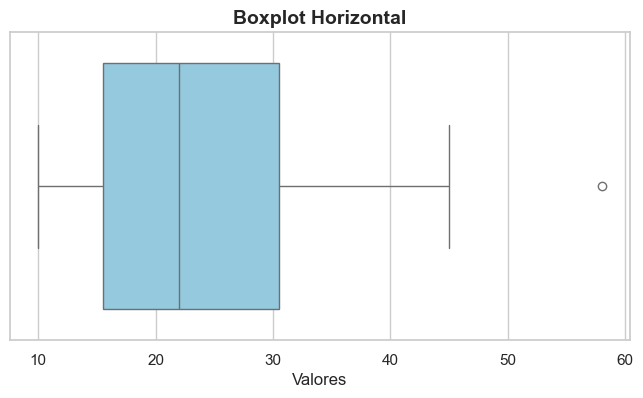

In [26]:
def ex_boxplot():
    # Exemplo de dados
    valores = [10, 12, 11, 20, 22, 19, 30, 29, 31, 45, 58]

    # Criar o boxplot horizontal
    plt.figure(figsize=(8, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=valores, color='skyblue')  # Note que x é usado para boxplots horizontais

    # Adicionar título e rótulo
    plt.title("Boxplot Horizontal", fontsize=14, fontweight='bold')
    plt.xlabel("Valores", fontsize=12)

    # Mostrar o gráfico
    plt.show()

ex_boxplot()

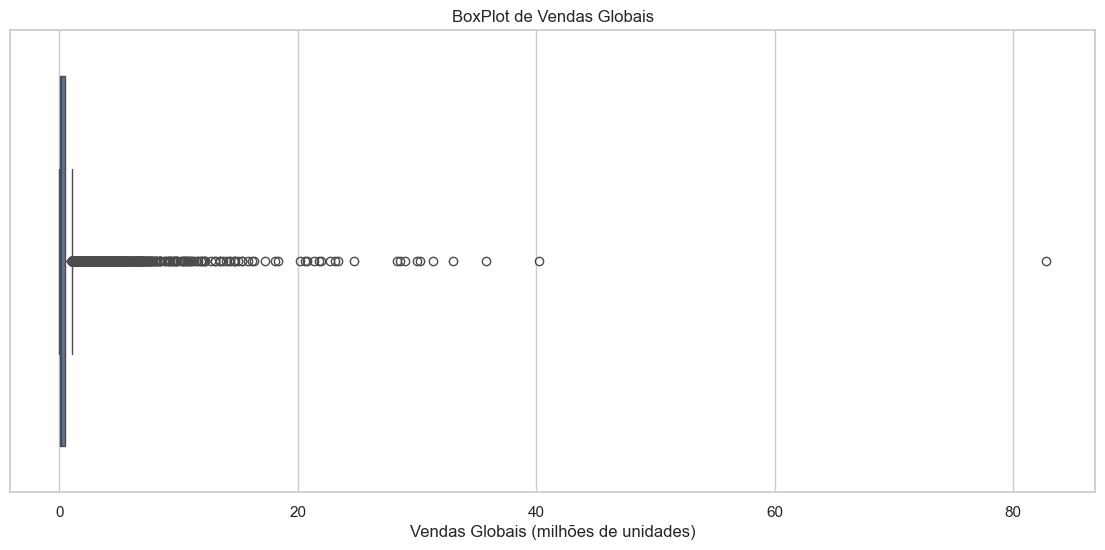

In [27]:
def G01Q01(): # Gráfico 01 da Questão 01
    plt.figure(figsize=(14,6))
    ax = sns.boxplot(data=db, x='global_vendas')

    plt.title('BoxPlot de Vendas Globais')
    plt.xlabel('Vendas Globais (milhões de unidades)')

    plt.show()

G01Q01()

**Dúvida: Por que esse boxplot ficou tão ruim?**

### **2. Quais são os gêneros de jogos mais populares em termos de vendas globais?**
> *Para responder essa pergunta, basta selecionarmos as colunas gênero e vendas globais, agrupar as linhas do dataset em relação ao gênero e somarmos os valores de 'global_vendas' com mesmo gênero.*

In [28]:
generos_populares = db[['genero', 'global_vendas']].groupby('genero').sum().reset_index()
generos_populares.sort_values(by='global_vendas',ascending=False, inplace=True)
generos_populares

,genero,global_vendas
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37
3,Misc,809.96
6,Racing,732.04
2,Fighting,448.91
9,Simulation,392.20
5,Puzzle,244.95


#### **Gráfico de Barras**

Dessa vez, tentemos um gráfico de barras

C:\Users\pedro\AppData\Local\Temp\ipykernel_10464\3647365339.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=generos_populares, x='genero', y='global_vendas', palette='magma')


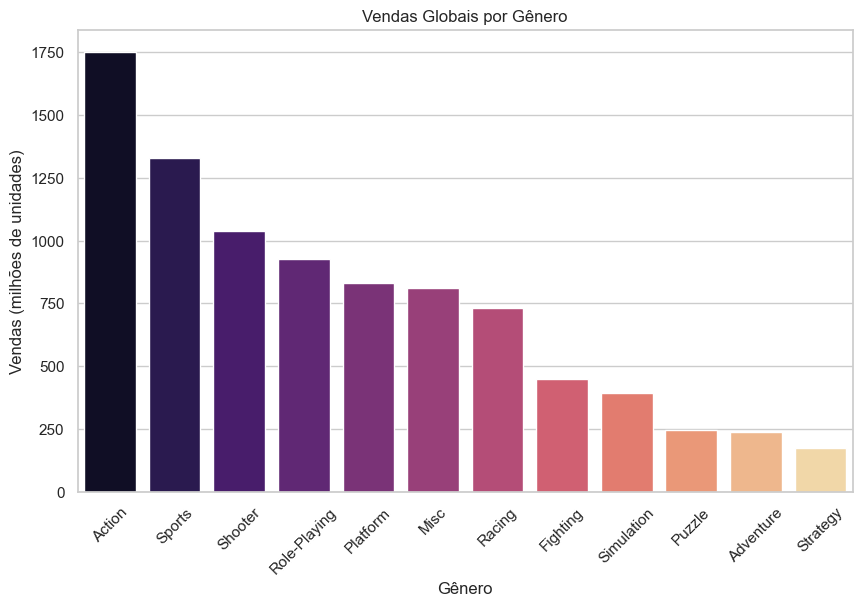

In [29]:
def G01Q02():
    plt.figure(figsize=(10,6))

    ax = sns.barplot(data=generos_populares, x='genero', y='global_vendas', palette='magma')

    plt.title('Vendas Globais por Gênero')
    plt.ylabel('Vendas (milhões de unidades)')
    plt.xlabel('Gênero')
    plt.xticks(rotation=45)

    plt.show()

G01Q02()

##### **E quais são os gêneros de jogos mais populares no Japão?**

### **3. Qual plataforma tem o maior número de jogos lançados? Isso se reflete nas vendas globais?**

    Uma função muito útil para responder perguntas que envolvem contagens é a `value_counts()`. Ela contabiliza o número de registros (linhas) para os diversos valores existentes de em uma coluna. O que facilita a vida quando usada em dados categóricos.

In [30]:
# Top 20 plataformas com mais jogos lançados
plataformas_lancamentos = db['plataforma'].value_counts()

top_20_plataformas = plataformas_lancamentos.head(20)
top_20_plataformas

plataforma
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
Name: count, dtype: int64

    Continuando a análise: isso se reflete nas vendas globais? Bom, para sabermos a resposta, devemos olhar quais as plataformas dos jogos com as maiores vendas globais

In [31]:
# db[['plataforma', 'global_vendas']].groupby(by='plataforma').sum().reset_index().sort_values(by='global_vendas', ascending=False)
# dividindo em partes

# Secção do dataset
plataformas_vendas = db[['plataforma', 'global_vendas']]
plataformas_vendas


,plataforma,global_vendas
0,Wii,82.74
1,NES,40.24
2,Wii,35.82
3,Wii,33.00
4,GB,31.37
...,...,...
16593,GBA,0.01
16594,GC,0.01
16595,PS2,0.01
16596,DS,0.01


In [32]:
# Agrupando os dados por plataforma e resetando o indíce (para voltar a ser um DataFrame - facilidade na hora de criar gráficos)
plataformas_vendas = plataformas_vendas.groupby('plataforma').sum().reset_index() # Sem o sum() o resultado seria apenas um objeto de agrupamento
plataformas_vendas

,plataforma,global_vendas
0,2600,97.08
1,3DO,0.10
2,3DS,247.46
3,DC,15.97
4,DS,822.49
5,GB,255.45
6,GBA,318.50
7,GC,199.36
8,GEN,28.36
9,GG,0.04


In [33]:
# Ordenando os resultados e limitando a visualização
plataformas_vendas.sort_values(by='global_vendas', ascending=False, inplace=True)
plataformas_vendas.head(10)

,plataforma,global_vendas
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


In [34]:
# Ou somente
db[['plataforma', 'global_vendas']].groupby(by='plataforma').sum().reset_index().sort_values(by='global_vendas', ascending=False).head(10)

,plataforma,global_vendas
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


> Juntar dataframes: a função `merge()` é utilizada para juntar (mergear) dataframes, o que é muito útil em análises como essas, em que avaliamos dois ou mais aspectos diferentes (no nosso caso, número de unidades vendidas e quantidades de jogos lançados) de uma mesma coluna (no nosso caso, plataforma).

In [35]:
df_merge = plataformas_vendas.merge(plataformas_lancamentos, on='plataforma')
df_merge.rename(columns={'count': 'numero_lancamentos'}, inplace=True)
df_merge

,plataforma,global_vendas,numero_lancamentos
0,PS2,1255.64,2161
1,X360,979.96,1265
2,PS3,957.84,1329
3,Wii,926.71,1325
4,DS,822.49,2163
5,PS,730.66,1196
6,GBA,318.50,822
7,PSP,296.28,1213
8,PS4,278.10,336
9,PC,258.82,960


#### **Gráfico de Barras Agrupadas**

Como estamos analisando mais de uma variável quantitativa de uma mesma classe, um gráfico de barras agrupadas serve muito bem.

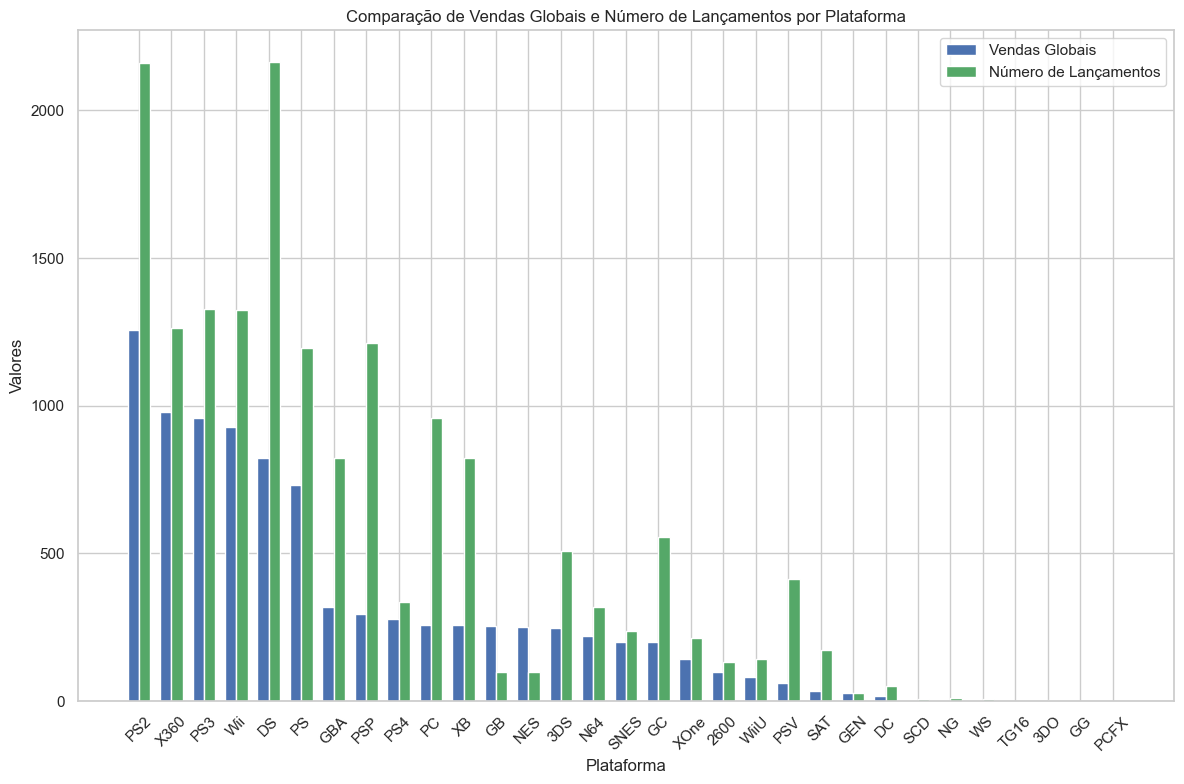

In [36]:
def G01Q03():
    # Definindo a largura das barras e a posição das plataformas no eixo x
    bar_width = 0.35
    x = np.arange(len(df_merge))

    fig, ax = plt.subplots(figsize=(12, 8))

    # Barras para global_vendas
    ax.bar(x - bar_width / 2, df_merge['global_vendas'], bar_width, color='b', label='Global Vendas')

    # Barras para numero_lancamentos
    ax.bar(x + bar_width / 2, df_merge['numero_lancamentos'], bar_width, color='g', label='Número de Lançamentos')

    ax.set_title('Comparação de Vendas Globais e Número de Lançamentos por Plataforma')
    ax.set_xlabel('Plataforma')
    ax.set_ylabel('Valores')
    ax.set_xticks(x)
    ax.set_xticklabels(df_merge['plataforma'], rotation=45)
    ax.legend(['Vendas Globais', 'Número de Lançamentos'])

    fig.tight_layout()
    plt.show()

G01Q03()

### **4. Quais são os 5 jogos mais vendidos?**

    Uma pergunta simples, pode ser resolvida com uma seleção de colunas.

In [37]:
top_5_vendidos = db.sort_values(by='global_vendas',ascending=False).head(5)
top_5_vendidos

,ranking,nome_jogo,plataforma,ano,genero,editora,NA_vendas,EU_vendas,JP_vendas,outras_vendas,global_vendas,preco,receita_NA,receita_EU,receita_JP,receita_outras,receita_global,anos_desde_lancamento
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,31.18,1293.66,904.84,117.55,263.78,2579.83,18
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,36.84,1071.31,131.89,250.88,28.37,1482.44,39
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,52.13,826.26,671.43,197.57,172.55,1867.30,16
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,12.02,189.32,132.34,39.43,35.58,396.66,15
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,50.34,567.33,447.52,514.47,50.34,1579.17,28


#### **Gráfico de Pizza**

Como há poucos dados, um gráfico de pizza pode ser conveniente para entender como se distribuem as vendas dos top 5 jogos mais vendidos. Mais uma vez, a porcentagem é calculada em cima do total de vendas **somente do top 5 jogos mais vendidos**

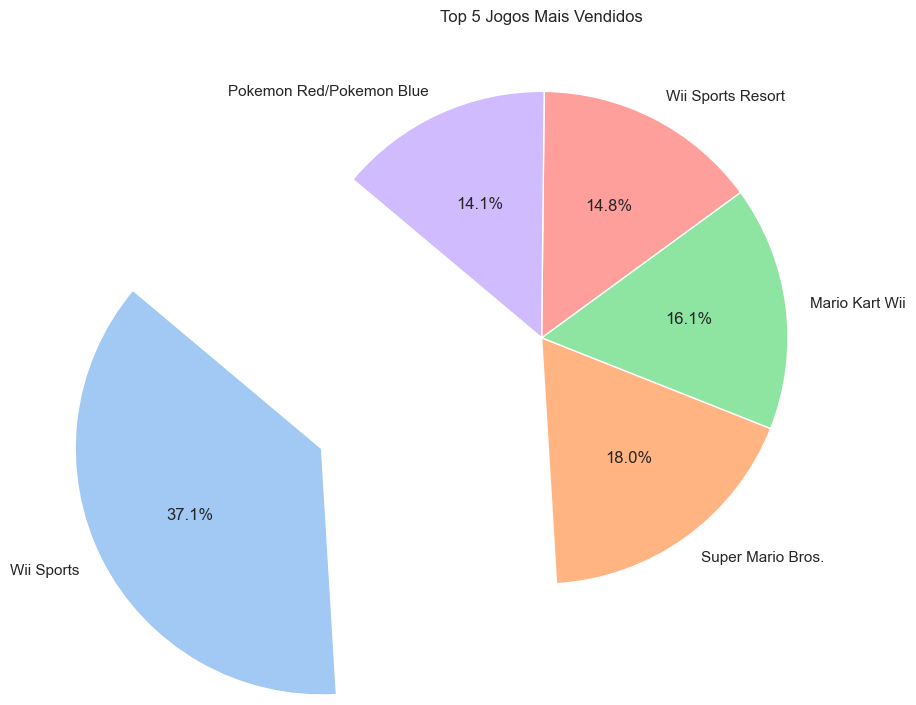

In [38]:
def G01Q04():
    plt.figure(figsize=(8, 8))
    explode = [1,0,0,0,0] # Destaque para algumas fatias
    colors = sns.color_palette('pastel')[0:5] # Cores
    plt.pie(
        top_5_vendidos["global_vendas"],
        labels=top_5_vendidos["nome_jogo"],
        autopct='%1.1f%%',  # Mostra porcentagens com 1 casa decimal
        startangle=140,  # Ângulo inicial para evitar sobreposição
        colors=colors,
        explode=explode
    )
    plt.title('Top 5 Jogos Mais Vendidos')
    plt.show()

G01Q04()

##### **E quais são os 5 jogos menos vendidos?**

### **5. Há diferenças significativas nas vendas entre regiões (América do Norte, Europa, Japão e outras regiões)?**

Para responder a essa pergunta, podemos utilizar o agrupamento de regiões dentro do df:

In [39]:

# Calculando a média de vendas em cada região
regioes = ['NA_vendas', 'EU_vendas', 'JP_vendas', 'outras_vendas']
regioes_med = {regiao: db[regiao].mean() for regiao in regioes}

def regioes_med_print():
    print("Média de vendas por região:")
    for regiao, med in regioes_med.items():
        print(f"{regiao}: {med:.2f}")

regioes_med_print()


Média de vendas por região:
NA_vendas: 0.26
EU_vendas: 0.15
JP_vendas: 0.08
outras_vendas: 0.05


Para testar, estatisticamente, se as médias de vendas diferem significativamente entre as regiões, podemos usar uma Análise de Variância (ANOVA). 
A Análise de Variância (ANOVA) é um método estatístico usado para comparar as médias de dois ou mais grupos e determinar se há diferenças estatisticamente significativas entre elas. A ANOVA pode ser realizada com o pacote scipy usando a função f_oneway.

Etapas básicas:
- Organizar os dados: Separe os valores das variáveis em grupos distintos.
- Realizar o teste: Use scipy.stats.f_oneway(grupo1, grupo2, ...) para comparar as médias.
- Interpretar os resultados: O teste retorna dois valores:

statistic: valor F (razão da variância entre grupos sobre a variância dentro dos grupos).

p-value: se for menor que o nível de significância (ex.: 0.05), rejeitamos a hipótese de médias iguais.
ANOVA assume que os dados seguem uma distribuição normal e possuem variâncias similares entre os grupos.

In [40]:
from scipy.stats import f_oneway

# Extração dos dados de vendas para cada região
na_vendas = db['NA_vendas']
eu_vendas = db['EU_vendas']
jp_vendas = db['JP_vendas']
outras_vendas = db['outras_vendas']

# Teste ANOVA
anova_result = f_oneway(na_vendas, eu_vendas, jp_vendas, outras_vendas)

# Resultados
def anova1():
    print("Resultados do teste ANOVA:")
    print(f"F-Estatística: {anova_result.statistic:.4f}")
    print(f"Valor-p: {anova_result.pvalue:.4f}")

    if anova_result.pvalue < 0.05:
        print("Conclusão: Há diferenças estatisticamente significativas nas médias de vendas entre as regiões.")
    else:
        print("Conclusão: Não há diferenças estatisticamente significativas nas médias de vendas entre as regiões.")

anova1()

Resultados do teste ANOVA:
F-Estatística: 583.5131
Valor-p: 0.0000
Conclusão: Há diferenças estatisticamente significativas nas médias de vendas entre as regiões.


### **6. Os gêneros de jogos têm um impacto estatisticamente significativo nas vendas globais? (Análise de variância - ANOVA pode ser usada para investigar se a média de vendas difere entre gêneros.)**

In [41]:
# Cálculo da média de vendas globais por gênero
med_genero = db.groupby('genero')['global_vendas'].mean().sort_values(ascending=False)

print("Média de vendas globais por gênero:")
print(med_genero)


Média de vendas globais por gênero:
genero
Platform        0.938341
Shooter         0.791885
Role-Playing    0.623233
Racing          0.586101
Sports          0.567319
Fighting        0.529375
Action          0.528100
Misc            0.465762
Simulation      0.452364
Puzzle          0.420876
Strategy        0.257151
Adventure       0.185879
Name: global_vendas, dtype: float64


Para verificar, estatisticamente, se as médias de vendas globais diferem entre gêneros, novamente utilizamos o teste ANOVA (uma via), pois estamos comparando múltiplos grupos (gêneros).

In [42]:
# Separação das vendas globais por gênero
generos_vendas = [db[db['genero'] == genero]['global_vendas'] for genero in db['genero'].unique()]

# Teste ANOVA
anova_result_genero = f_oneway(*generos_vendas)

# Resultados
def anova2():
    print("\nResultados do teste ANOVA para gêneros:")
    print(f"F-Estatística: {anova_result_genero.statistic:.4f}")
    print(f"Valor-p: {anova_result_genero.pvalue:.4f}")

    if anova_result_genero.pvalue < 0.05:
        print("Conclusão: Há diferenças estatisticamente significativas nas médias de vendas globais entre os gêneros.")
    else:
        print("Conclusão: Não há diferenças estatisticamente significativas nas médias de vendas globais entre os gêneros.")

anova2()


Resultados do teste ANOVA para gêneros:
F-Estatística: 18.2182
Valor-p: 0.0000
Conclusão: Há diferenças estatisticamente significativas nas médias de vendas globais entre os gêneros.


### **7. Há uma diferença estatisticamente significativa entre as vendas médias de jogos lançados antes e depois de 2010? (Pode ser feita uma análise de teste de hipóteses, como o teste t de médias.)**

In [43]:
# Separando jogos antes e depois de 2010
antes_2010 = db[db['ano'] <= 2010]['global_vendas']
depois_2010 = db[db['ano'] > 2010]['global_vendas']

# Calculando a média de vendas
media_antes = antes_2010.mean()
media_depois = depois_2010.mean()

print(f"Média de vendas antes de 2010: {media_antes:.2f}")
print(f"Média de vendas depois de 2010: {media_depois:.2f}")


Média de vendas antes de 2010: 0.55
Média de vendas depois de 2010: 0.49


Aqui, utilizamos um teste t-Student para amostras independentes, que é ideal para comparar duas médias.

In [44]:
from scipy.stats import ttest_ind

# Separação dos jogos antes e depois de 2010
antes_2010 = db[db['ano'] <= 2010]['global_vendas']
depois_2010 = db[db['ano'] > 2010]['global_vendas']

# Teste t para comparar as médias antes e depois de 2010
ttest_result = ttest_ind(antes_2010, depois_2010, equal_var=False)  # assume-se variâncias diferentes

# Resultados
def tteste():
    print("\nResultados do teste t para vendas antes e depois de 2010:")
    print(f"T-Estatística: {ttest_result.statistic:.4f}")
    print(f"Valor-p: {ttest_result.pvalue:.4f}")

    if ttest_result.pvalue < 0.05:
        print("Conclusão: Há uma diferença estatisticamente significativa nas vendas médias antes e depois de 2010.")
    else:
        print("Conclusão: Não há uma diferença estatisticamente significativa nas vendas médias antes e depois de 2010.")

tteste()



Resultados do teste t para vendas antes e depois de 2010:
T-Estatística: 2.3099
Valor-p: 0.0209
Conclusão: Há uma diferença estatisticamente significativa nas vendas médias antes e depois de 2010.


### **8. Quais são as plataformas com as maiores vendas globais e como elas se comparam entre si?**

In [45]:
# Calculando o total de vendas globais
total_global_vendas = db['global_vendas'].sum()

# Calculando as vendas globais por plataforma
vendas_plataforma = db.groupby('plataforma')['global_vendas'].sum().sort_values(ascending=False)

# Selecionando as 5 maiores
top_5_plataformas = vendas_plataforma.head(5)
top_5_porcentages = (top_5_plataformas / total_global_vendas) * 100

print("Top 5 plataformas com as maiores vendas globais e suas porcentagens:")
for plataforma, vendas in top_5_plataformas.items():
    print(f"Plataforma: {plataforma} | Vendas Globais: {vendas:.2f} milhões | Porcentagem do Total: {top_5_porcentages[plataforma]:.2f}%")


Top 5 plataformas com as maiores vendas globais e suas porcentagens:
Plataforma: PS2 | Vendas Globais: 1255.64 milhões | Porcentagem do Total: 14.08%
Plataforma: X360 | Vendas Globais: 979.96 milhões | Porcentagem do Total: 10.99%
Plataforma: PS3 | Vendas Globais: 957.84 milhões | Porcentagem do Total: 10.74%
Plataforma: Wii | Vendas Globais: 926.71 milhões | Porcentagem do Total: 10.39%
Plataforma: DS | Vendas Globais: 822.49 milhões | Porcentagem do Total: 9.22%


#### **Gráfico de Pareto**

O gráfico de Pareto combina um gráfico de colunas com uma linha acumulativa e é ótimo para destacar as plataformas que contribuem com a maior das vendas globais (princípio 80/20).

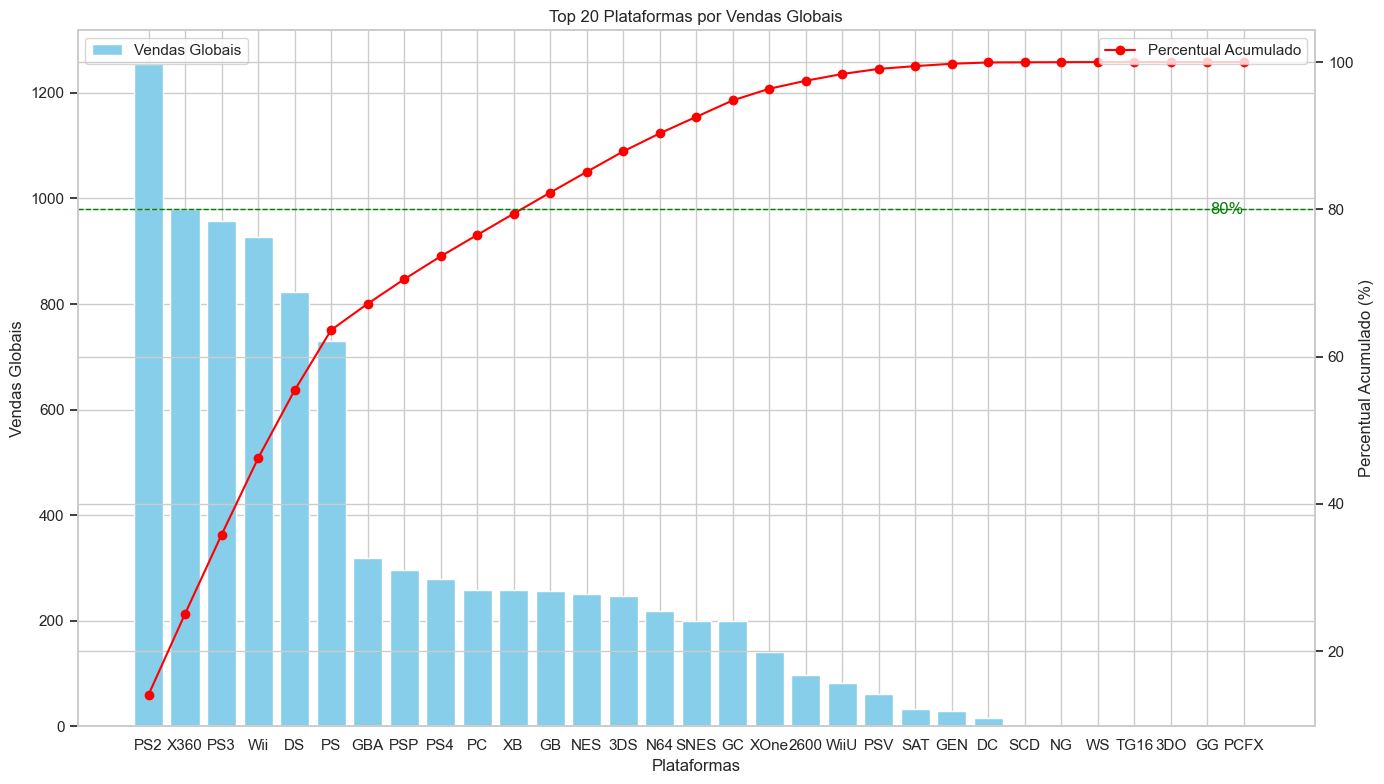

In [46]:
def G01Q08():
    # Separa valores e índice
    indice = df_merge.plataforma.tolist()
    valores = df_merge.global_vendas.tolist()

    # Calcula a porcentagem acumulativa
    porcentagem_cumulativa = np.cumsum(valores) / sum(valores) * 100

    fig, ax = plt.subplots(figsize=(14, 8))

    # Barras para número de jogos
    ax.bar(indice, valores, color='skyblue', label='Vendas Globais')

    # Linha acumulativa de percentual
    ax2 = ax.twinx() # Define eixo secundário (o de barra cumulativa)
    ax2.plot(indice, porcentagem_cumulativa, color='red', marker='o', label='Percentual Acumulado')
    ax2.set_ylabel('Percentual Acumulado (%)')

    # Adiciona linhas de referência em 80%
    ax2.axhline(80, color='green', linestyle='--', linewidth=1) # desenha a linha
    ax2.text(len(indice)-1, 80, '80%', color='green', ha='right', va='center') # desenha o texto

    # Exibir legendas
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

    ax.set_title('Top 20 Plataformas por Vendas Globais')
    ax.set_ylabel('Vendas Globais')
    ax.set_xlabel('Plataformas')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

G01Q08()

### **9. Quais jogos geraram as maiores receitas globais e quais características eles compartilham?**

Para resolver isso, podemos utilizar o conceito de nlargest(), disponível para Series do Pandas, ele retorna os n maiores valores de uma coluna ou conjunto de dados, mantendo a ordem decrescente. É útil para rapidamente identificar os maiores elementos com base em um critério específico.

In [47]:
top_5_receitas = db.nlargest(5, 'receita_global')[['nome_jogo', 'genero', 'plataforma', 'receita_global', 'anos_desde_lancamento']]

print("Jogos com maior receita global e suas características:")
print(top_5_receitas)

Jogos com maior receita global e suas características:
                   nome_jogo    genero plataforma  receita_global  \
0                 Wii Sports    Sports        Wii         2579.83   
6      New Super Mario Bros.  Platform         DS         2038.58   
8  New Super Mario Bros. Wii  Platform        Wii         1898.36   
2             Mario Kart Wii    Racing        Wii         1867.30   
9                  Duck Hunt   Shooter        NES         1821.18   

   anos_desde_lancamento  
0                     18  
6                     18  
8                     15  
2                     16  
9                     40  


##### **E quais jogos geraram as menores receitas globais?**

### **10. Existe uma relação entre o preço dos jogos e suas vendas globais?**

Aqui utilizaremos o método .corr() no Pandas que calcula a correlação entre colunas numéricas do DataFrame, medindo a força e direção da relação linear (valores entre -1 e 1). Ele suporta métodos como pearson (padrão, mede a correlação linear entre duas variáveis, com valores entre -1 e 1), kendall (baseado em rankings, calcula a concordância entre dois conjuntos de dados) e spearman (também utiliza rankings, mas calcula a correlação como Pearson faria com dados ranqueados).

In [48]:
correlacao = db[['preco', 'global_vendas']].corr().iloc[0, 1]

print(f"Correlação entre preço e vendas globais: {correlacao:.4f}")

Correlação entre preço e vendas globais: -0.0034


#### **Heatmap**

Para visualizar melhor a correlação entre variáveis plotaremos um heatmap que é uma representação visual de dados em que valores são exibidos como cores, facilitando a identificação de padrões, correlações ou concentrações.

In [49]:
# Criando uma matriz de correlação
matriz_corr = db[['preco', 'global_vendas']].corr()

print("Matriz de correlação entre preço e vendas globais:")
print(matriz_corr)
def G01Q10():
  # Plotando um heatmap
  plt.figure(figsize=(6, 4))
  sns.heatmap(matriz_corr, annot=True, cmap="inferno", fmt=".4f")
  plt.title("Matriz de Correlação entre Preço e Vendas Globais")
  plt.show()

Matriz de correlação entre preço e vendas globais:
                  preco  global_vendas
preco          1.000000      -0.003399
global_vendas -0.003399       1.000000


##### **E quanto à relação entre preço dos jogos e suas posições no ranking?**

## **📈 Resultados**

### **1. Quais os valores de média, mediana, variância, desvio padrão, mínimo e máximo de vendas globais?**

Com valores que oscilam na faixa de **0.5374 ± 1.5550 milhões de unidades**, percebe-se que o desvio padrão é significativamente maior do que a média. Isso indica que os dados são altamente dispersos em torno da média, com valores que variam amplamente entre as observações. Essa grande dispersão reflete a existência de valores extremos no conjunto, o que pode ser observado pelos valores máximo e mínimo.

A mediana, que é o ponto central do conjunto de dados, apresenta um valor de **0.17 milhões de unidades**, consideravelmente inferior à média. Esse contraste sugere que a distribuição dos dados é assimétrica e possivelmente enviesada à direita, com alguns valores muito elevados (outliers) influenciando a média para cima.

Já a variância, calculada em **2.4181 milhões de unidades ao quadrado**, reforça a alta dispersão dos dados, mas por si só, tem pouca relevância prática devido à sua unidade estar ao quadrado. Nesse contexto, o desvio padrão é uma métrica mais interpretável para descrever a dispersão dos dados.

Por fim, os valores mínimo e máximo variam de **0.01 milhões de unidades** a **impressionantes 82.74 milhões de unidades**. Essa grande amplitude ilustra a presença de valores extremos que aumentam significativamente a dispersão do conjunto de dados, sendo um ponto de atenção ao interpretar as métricas gerais.

> O boxplot dessa questão apresenta uma visualização muito pobre devido à grande variabilidade dos dados.

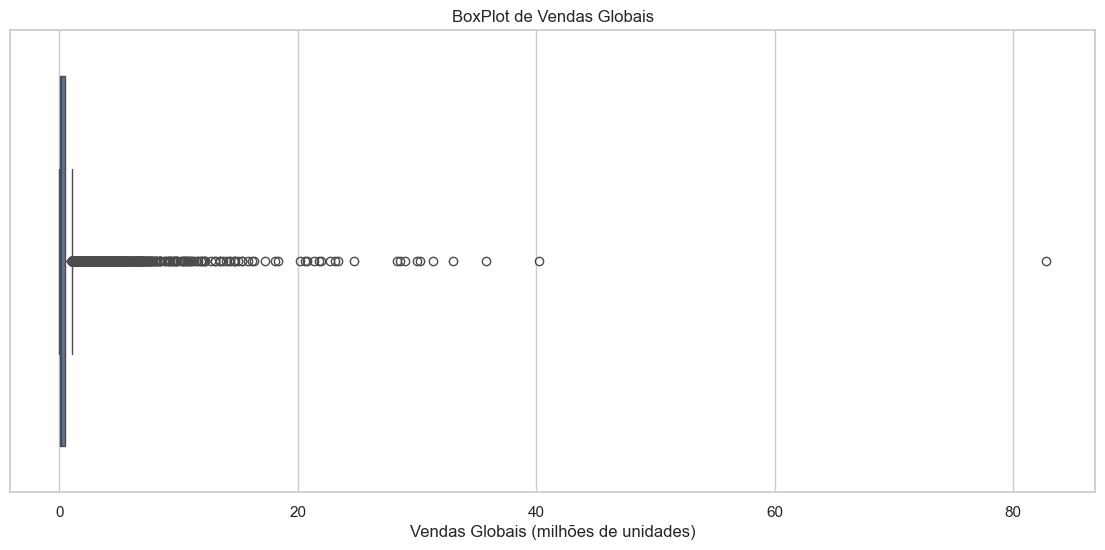

In [50]:
G01Q01()

### **2. Quais são os gêneros de jogos mais populares em termos de vendas globais?**

Em termos de vendas globais, o gênero de ação apresenta o maior sucesso comercial (1751.18 milhões de unidades), seguido do gênero de esportes (1330.93 milhões unidades) e do gênero de tiro (1037.37 milhões de unidades). Com exceção desse top 3, nenhum gênero conseguiu bater a marca de 1 bilhão de unidades, o que indica a preferência global por gênero de jogos.

In [51]:
generos_populares

,genero,global_vendas
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37
3,Misc,809.96
6,Racing,732.04
2,Fighting,448.91
9,Simulation,392.20
5,Puzzle,244.95


> O gráfico de vendas globais por gênero demonstra a preferência global por jogos de ação e o baixo interesse por jogos de estratégia. Pelo fato do número de gêneros avaliados não ser grande (apenas 12) e não haver um gênero que destoe muito dos outros, o gráfico apresenta uma boa visualização e ótima escala.

C:\Users\pedro\AppData\Local\Temp\ipykernel_10464\3647365339.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=generos_populares, x='genero', y='global_vendas', palette='magma')


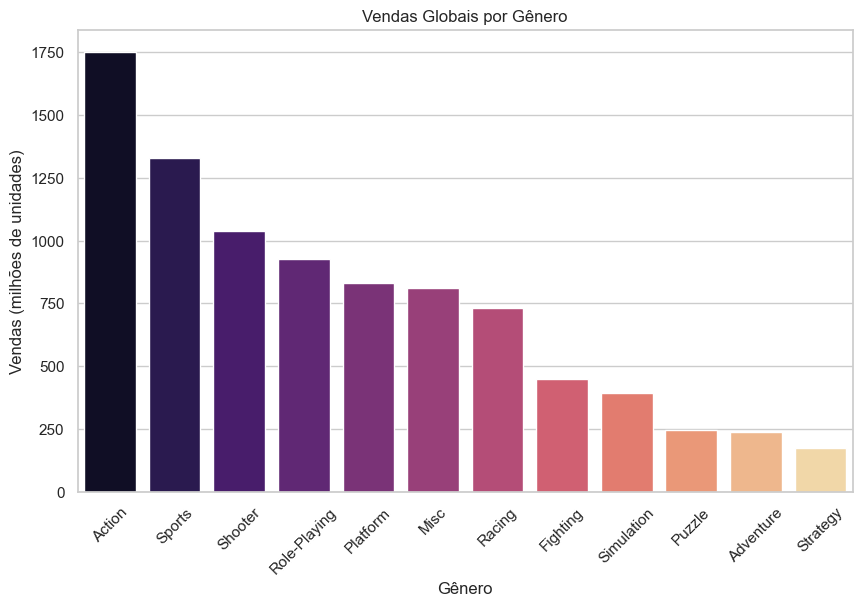

In [52]:
G01Q02()

### **3. Qual plataforma tem o maior número de jogos lançados? Isso se reflete nas vendas globais?**

Discutir sobre essa pergunta se torna muito mais fácil se analisarmos primeiro o gráfico:

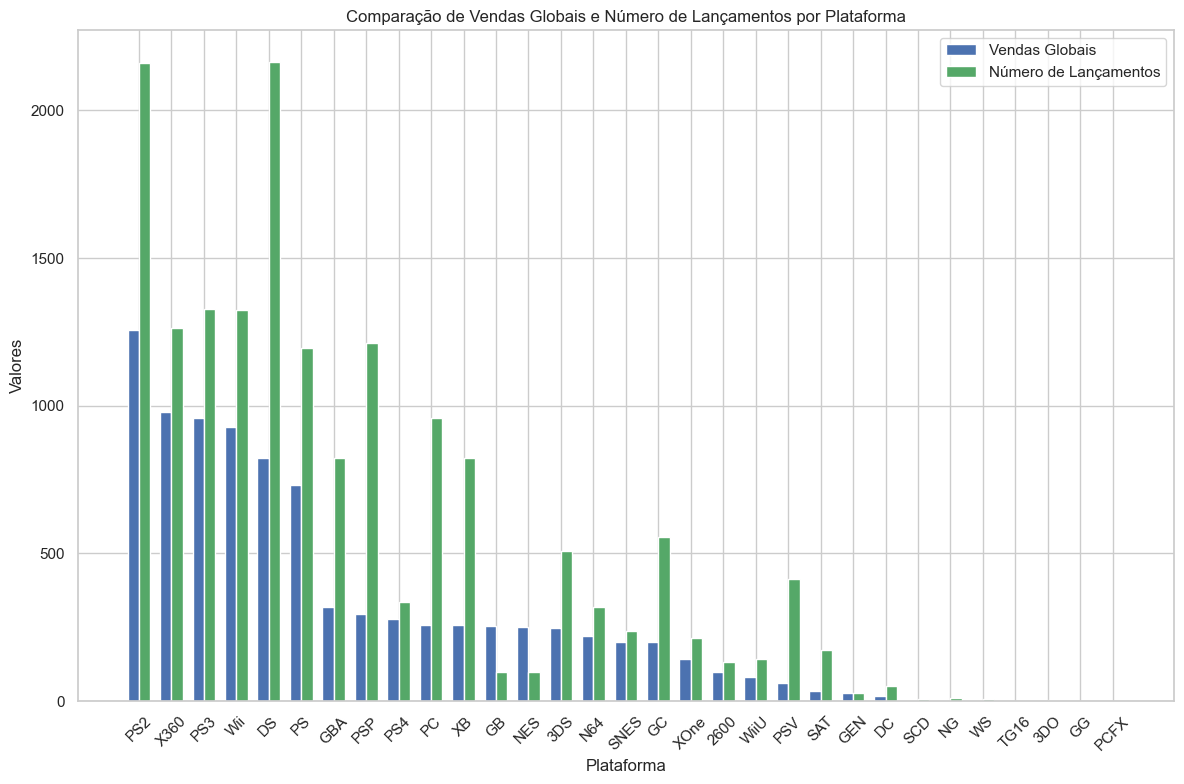

In [53]:
G01Q03()

As plataformas PS2, X360 e PS3 se destacam, liderando tanto em vendas globais quanto em lançamentos, o que reflete seu grande sucesso comercial. Por outro lado, plataformas como *SP, DS e PS4 têm um número significativo de lançamentos**, mas suas vendas globais não atingem o mesmo nível de sucesso, sugerindo uma discrepância entre a quantidade de jogos e o impacto no mercado. Já plataformas como PSV, GEN e SCD apresentam números baixos em ambas as categorias, indicando menor popularidade e impacto. O **gráfico também evidencia que, em muitas plataformas, o número de lançamentos é maior que as vendas, indicando que mais jogos lançados não necessariamente se traduzem em maiores vendas.**

### **4. Quais são os 5 jogos mais vendidos?**

Os 5 jogos mais vendidos foram Wii Sports (82.74 milhões de unidades), Super Mario Bros (40.24 milhões de unidades), Mario Kart Wii (35.82 milhões de unidades), Wii Sports Resort (33.00 milhões de unidades) e Pokemon Red/Pokemon Blue (31.37 milhões de unidades).

In [54]:
top_5_vendidos

,ranking,nome_jogo,plataforma,ano,genero,editora,NA_vendas,EU_vendas,JP_vendas,outras_vendas,global_vendas,preco,receita_NA,receita_EU,receita_JP,receita_outras,receita_global,anos_desde_lancamento
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,31.18,1293.66,904.84,117.55,263.78,2579.83,18
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,36.84,1071.31,131.89,250.88,28.37,1482.44,39
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,52.13,826.26,671.43,197.57,172.55,1867.30,16
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,12.02,189.32,132.34,39.43,35.58,396.66,15
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,50.34,567.33,447.52,514.47,50.34,1579.17,28


Um ponto interessante a se destacar é que todos os jogos do top 5 mais vendidos têm a mesma editora.

> O gráfico construído aqui tem mais um intuito demonstrativo, visto que gráficos de pizza devem ser utilizados com cautela...
Também é importante lembrar que as porcentagens calculadas refletem o total de vendas somente dos top 5 jogos mais vendidos.

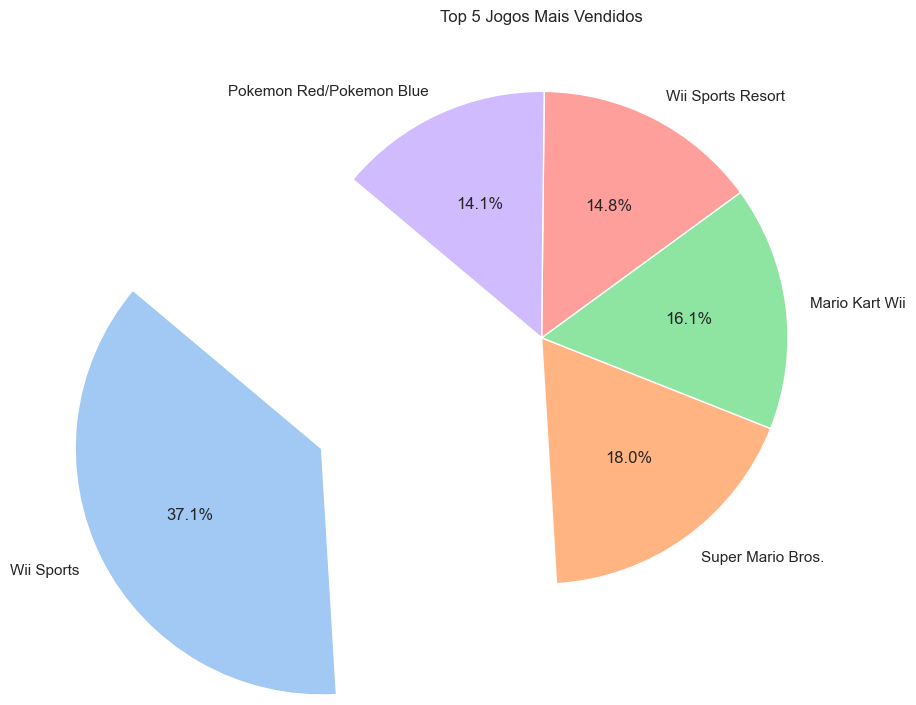

In [55]:
G01Q04()

### **5. Há diferenças significativas nas vendas entre regiões (América do Norte, Europa, Japão e outras regiões)?**

In [56]:
regioes_med_print()
print()
anova1()

Média de vendas por região:
NA_vendas: 0.26
EU_vendas: 0.15
JP_vendas: 0.08
outras_vendas: 0.05

Resultados do teste ANOVA:
F-Estatística: 583.5131
Valor-p: 0.0000
Conclusão: Há diferenças estatisticamente significativas nas médias de vendas entre as regiões.


Com base nos resultados apresentados, podemos observar diferenças estatisticamente significativas nas médias de vendas entre as regiões, conforme confirmado pelo **teste ANOVA (F = 583.5131, p = 0.0000)**. Isso indica que as diferenças observadas nas médias regionais de vendas não são aleatórias e refletem características distintas de cada mercado.

A **América do Norte lidera com uma média de 0.264 milhões de unidades vendidas**, refletindo a forte demanda e a presença de grandes empresas de videogame na região. A **Europa vem em segundo lugar, com 0.147 milhões de unidades em média**, uma participação expressiva, mas ainda distante da América do Norte, possivelmente devido à diversidade de mercados e idiomas. **O Japão, que teve uma média de 0.078 milhões de unidades**, apesar de ser um mercado tradicionalmente importante, tem uma participação menor, o que pode ser atribuído à preferência por jogos locais e à saturação do mercado. Por fim, as **outras regiões representam 0.048 milhões de unidades em média**, refletindo mercados menores ou em crescimento.

Esses resultados confirmam que os mercados regionais são distintos em termos de demanda, e que estratégias personalizadas podem ser necessárias para maximizar o desempenho de vendas em cada uma delas. A análise reforça a importância de compreender as características culturais e econômicas de cada região para otimizar o alcance e o impacto das estratégias de marketing e distribuição.

### **6. Os gêneros de jogos têm um impacto estatisticamente significativo nas vendas globais?**

In [57]:
print(med_genero)
print()
anova2()

genero
Platform        0.938341
Shooter         0.791885
Role-Playing    0.623233
Racing          0.586101
Sports          0.567319
Fighting        0.529375
Action          0.528100
Misc            0.465762
Simulation      0.452364
Puzzle          0.420876
Strategy        0.257151
Adventure       0.185879
Name: global_vendas, dtype: float64


Resultados do teste ANOVA para gêneros:
F-Estatística: 18.2182
Valor-p: 0.0000
Conclusão: Há diferenças estatisticamente significativas nas médias de vendas globais entre os gêneros.


Com base nos resultados do teste **ANOVA (F = 18.2182, p = 0.0000)**, confirmamos que há diferenças estatisticamente significativas nas médias de vendas globais entre os gêneros. Isso indica que a popularidade dos jogos varia de forma consistente dependendo do gênero, refletindo diferentes níveis de aceitação ou demanda no mercado.

O gênero **"Platform"** lidera com uma **média de 0.938 milhões de unidades vendidas**, destacando-se como o mais lucrativo. Isso sugere uma preferência clara por jogos que envolvem deslocamento em plataformas, correndo e pulando entre obstáculos, um estilo tradicionalmente popular entre os gamers. Seguindo o ranking, os gêneros **"Shooter" (0.791 milhões)** e **"Role-Playing" (0.623 milhões)** também se mostram altamente relevantes, refletindo a popularidade consistente de jogos que oferecem uma experiência imersiva e desafiadora, seja por meio de combates ou histórias envolventes.

**"Racing" (0.586 milhões)** e **"Sports" (0.567 milhões)** completam a lista dos gêneros mais bem-sucedidos, sugerindo que jogos que simulam atividades reais, como esportes ou corridas, também atraem uma audiência ampla. Por outro lado, gêneros como **"Adventure" (0.186 milhões)** e **"Strategy" (0.257 milhões)** apresentam as menores médias de vendas, indicando uma demanda relativamente limitada por jogos que dependem mais de enredo ou planejamento estratégico.

### **7. Há uma diferença estatisticamente significativa entre as vendas médias de jogos lançados antes e depois de 2010?**

In [58]:
print(f"Média de vendas antes de 2010: {media_antes:.2f}")
print(f"Média de vendas depois de 2010: {media_depois:.2f}")
print()
tteste()

Média de vendas antes de 2010: 0.55
Média de vendas depois de 2010: 0.49


Resultados do teste t para vendas antes e depois de 2010:
T-Estatística: 2.3099
Valor-p: 0.0209
Conclusão: Há uma diferença estatisticamente significativa nas vendas médias antes e depois de 2010.


Com os resultados obtidos, incluindo a T-Estatística de 2.4538 e o valor-p de 0.0142, confirmamos que há uma diferença estatisticamente significativa nas vendas médias antes e depois de 2010. Apesar disso, a diferença prática entre as médias é modesta, com valores de 0.55 milhões de unidades antes de 2010 e 0.49 milhões de unidades depois de 2010, representando uma redução de cerca de 6%.

Esses resultados indicam que, embora a significância estatística sugira uma mudança no comportamento das vendas entre os dois períodos, a diferença real nas médias não é tão expressiva. Isso sugere que, após 2010, a demanda por jogos não cresceu de maneira relevante e permaneceu relativamente estável. Essa estabilização pode refletir um mercado maduro, onde novos lançamentos e avanços tecnológicos na produção e design de jogos não foram suficientes para atrair novos públicos ou expandir significativamente a base de consumidores.

### **8. Quais são as plataformas com as maiores vendas globais e como elas se comparam entre si?**

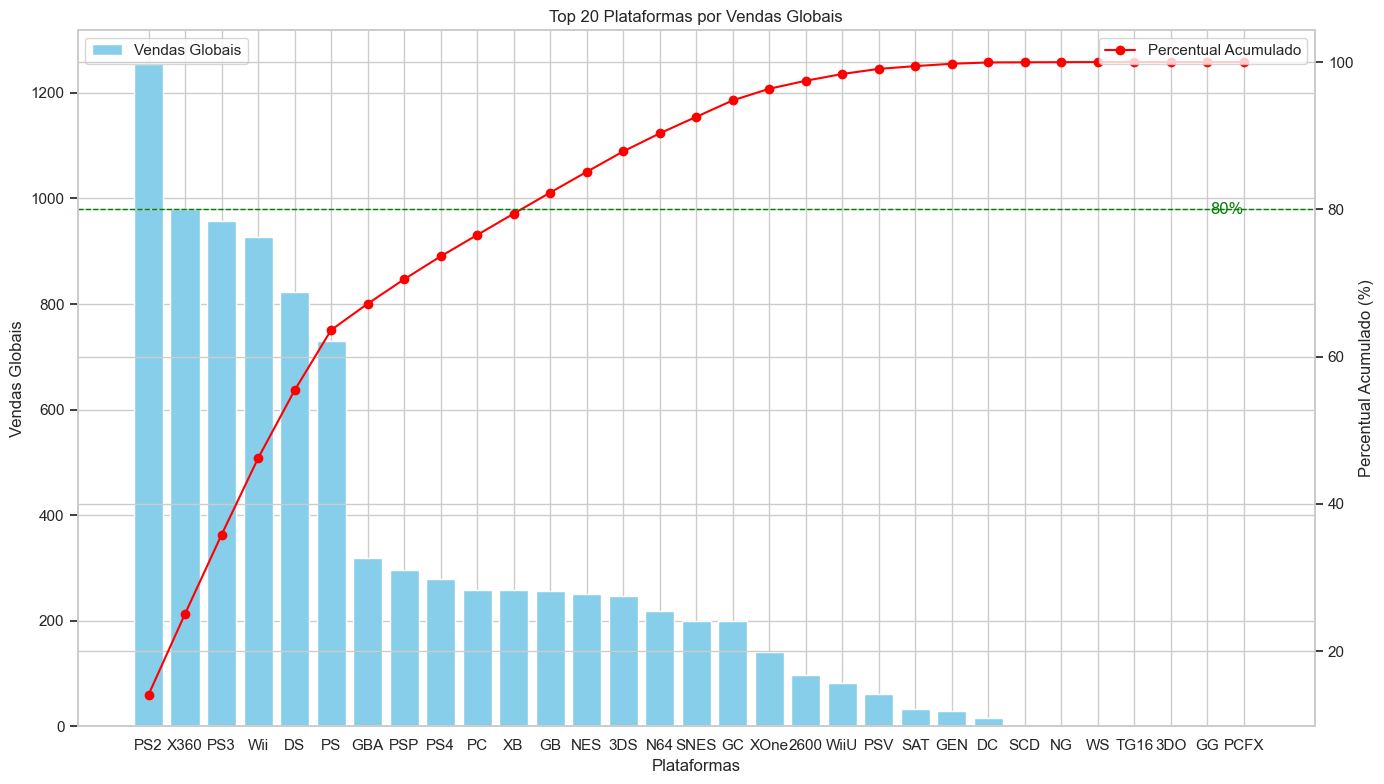

In [59]:
G01Q08()

O top 5 plataformas com maiores vendas globais foi: PS2, X360, PS3, Wii e DS. Podemos notar que juntas elas são responsáveis por 55,42% das vendas globais. Possíveis questionamentos que podemos fazer e investigar é: por que a maioria das vendas são concentradas dentro dessas plataformas? Como estender esse resultado para as outras? Existe alguma ação de marketing por trás do sucesso que podemos aplicar para as plataformas menos rentáveis?

### **9. Quais jogos geraram as maiores receitas globais e quais características eles compartilham?**

In [60]:
print(top_5_receitas)

                   nome_jogo    genero plataforma  receita_global  \
0                 Wii Sports    Sports        Wii         2579.83   
6      New Super Mario Bros.  Platform         DS         2038.58   
8  New Super Mario Bros. Wii  Platform        Wii         1898.36   
2             Mario Kart Wii    Racing        Wii         1867.30   
9                  Duck Hunt   Shooter        NES         1821.18   

   anos_desde_lancamento  
0                     18  
6                     18  
8                     15  
2                     16  
9                     40  


O jogo mais vendido é de esportes, mas podemos perceber que no top 5 só aparece ele desse gênero. Nota-se que a plataforma para qual foram produzidos é mesma para o terceiro e quarto lugar nessa classificação, indicando que jogos feitos para Wii têm sucesso, mas não mantém a consistência necessária para dominar o cenário entre as plataformas já que na questão anterior vimos que quem domina as vendas globais são jogos feitos para PS2.

### **10. Existe uma relação entre o preço dos jogos e suas vendas globais?**

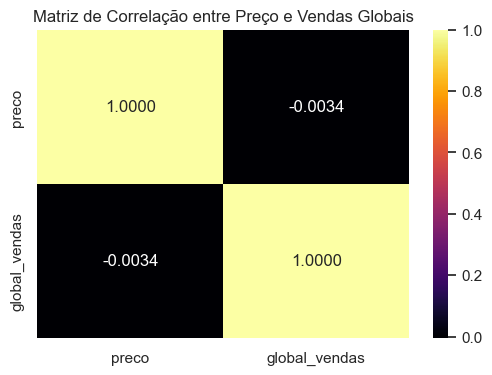

In [61]:
G01Q10()

Pelo heatmap observamos que não existe correlação entre vendas e preço, o que não é intuitivo, já que imaginamos em primeiro momento que o público vá preferir produtos mais em conta. Porém, percebemos que as pessoas com interesse em jogos são mais seletivas em suas escolhas e prezam mais por qualidade do que quantidade. Isso pode ser útil na elobaração de estretégia de vendas dos produtos de cada plataforma.

## **💡 Conclusões**

Ao longo deste notebook, tivemos como objetivo apresentar e ensinar conceitos básicos de análise de dados, utilizando um dataset de vendas de jogos como exemplo prático. Através das análises realizadas e das respostas às 10 perguntas propostas, conseguimos alcançar esse objetivo de forma clara e prática, proporcionando uma introdução sólida ao tema.

Iniciamos explorando métricas fundamentais como média, mediana, variância e desvio padrão, compreendendo como elas descrevem a dispersão dos dados. Foi possível observar uma alta variabilidade nas vendas globais, destacando a relevância de considerar valores extremos (outliers) ao interpretar resultados. Avançamos para análises baseadas em categorias, identificando que gêneros de ação e esportes lideram as vendas globais, enquanto o gênero de estratégia apresenta menor apelo comercial. Já no caso das plataformas, foi possível perceber que maior número de lançamentos não garante maior sucesso comercial, como evidenciado por plataformas que, mesmo com muitos jogos lançados, não atingiram vendas expressivas.

A introdução de técnicas estatísticas inferenciais, como ANOVA e teste t, permitiu investigar padrões mais profundos. Descobrimos que gêneros como Platform e Shooter apresentam maiores médias de vendas, indicando forte aceitação do público. Já as vendas de jogos antes e depois de 2010 apresentaram uma diferença estatisticamente significativa, mas com impacto prático modesto, reforçando a estabilidade na demanda ao longo do tempo. Por fim, a análise entre preço e vendas revelou ausência de correlação, sugerindo que o público gamer prioriza qualidade e experiência, muitas vezes optando por jogos de maior produção, independentemente do preço

Por fim, as análises também trouxeram reflexões importantes sobre a concentração das vendas em poucas plataformas e títulos. Esse fenômeno levanta questões sobre como expandir o sucesso para outros segmentos e mercados, além de fornecer subsídios para a elaboração de estratégias de marketing voltadas a plataformas menos rentáveis.

Com essas análises, foi possível demonstrar na prática como aplicar técnicas básicas de exploração e tratamento de dados, incluindo a identificação e o tratamento de outliers, o uso de gráficos para visualização e a aplicação de estatísticas descritivas e inferenciais. Dessa forma, acreditamos que o notebook cumpriu seu papel de introduzir os conceitos fundamentais de análise de dados e estimular reflexões sobre a aplicação prática desse conhecimento. Obrigado pela atenção e até a próxima!

## **📖 Referências**
Banco de dados disponível em: [Video Game Sales](https://www.kaggle.com/datasets/gregorut/videogamesales)

Link do Material Didático disponível em: []()


### Equipe:

1. [Kely Murta](https://github.com/kelymurta)
2. [Pedro Rocha](https://github.com/pedro-niHiL)
3. [Eduarda Mascarenhas](https://github.com/dudxyz)